In [1]:
import pandas as pd
import os,sys
#sys.path.append(os.path.abspath(os.path.join('..')))
#print(os.getcwd())
from xgboost import XGBClassifier
#from scripts.modeling import Modeler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

from sklearn.metrics import log_loss

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from modeling import Modeler


In [24]:
df = pd.read_csv("../data/AdSmartABdata.csv")
analyzer = Modeler(df)
numeric_pipeline = analyzer.generate_pipeline("numeric")
numeric_transformation =  analyzer.generate_transformation(numeric_pipeline,"numeric","number")
numerical_features = analyzer.store_features("numeric","number")
categorical_features = analyzer.store_features("categorical","number")

In [26]:
analyzer.merge_data()

,hour,platform_os,yes,no,date_2020-07-03,date_2020-07-04,date_2020-07-05,date_2020-07-06,date_2020-07-07,date_2020-07-08,date_2020-07-09,date_2020-07-10,auction_id,experiment,device_make,browser
0,8,6,0,0,0,0,0,0,0,0,0,1,0,1,46,2
1,10,6,0,0,0,0,0,0,1,0,0,0,1,1,46,2
2,2,6,0,1,0,0,1,0,0,0,0,0,2,1,29,3
3,15,6,0,0,1,0,0,0,0,0,0,0,3,0,137,6
4,15,6,0,0,1,0,0,0,0,0,0,0,4,0,46,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8072,7,6,0,0,0,0,1,0,0,0,0,0,8072,1,46,2
8073,15,6,0,0,1,0,0,0,0,0,0,0,8073,0,46,2
8074,9,6,0,0,0,1,0,0,0,0,0,0,8074,0,46,2
8075,15,6,0,0,0,0,1,0,0,0,0,0,8075,1,130,14


In [4]:
analyzer.model(RandomForestClassifier,n_estimators=100)

(array([[740,  12],
        [ 55,   1]], dtype=int64),
 0.9170792079207921)

In [5]:
analyzer.evaluate(5,RandomForestClassifier,n_estimators=100)

(0.9134587560923275, 0.906559405940594, 0.9195046439628483)

In [7]:
analyzer.evaluate(5,RandomForestClassifier,column="browser",n_estimators=100)

(0.7543607270943812, 0.7331269349845201, 0.7716584158415841)

In [8]:
analyzer.evaluate(5,RandomForestClassifier,column="platform_os",n_estimators=100)

(0.9991333568341354, 0.9987616099071207, 1.0)

In [5]:
analyzer.model( DecisionTreeClassifier)

(array([[  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0, 408,  29,   0,   7,   0,   0,   0,   0,   1,   1],
        [  0,  31,  84,   0,  14,   0,   0,   0,   0,   0,  30],
        [  0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0],
        [  0,   8,  19,   0,  32,   0,   0,   0,   0,   0,  27],
        [  0,   0,   0,   2,   0,  27,   5,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   5,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,  26,   0,  17,   0,   0,   0,   1,   0,  26]],
       dtype=int64),
 0.7141089108910891)

In [13]:
analyzer.evaluate(5,DecisionTreeClassifier)

(0.858115746559176, 0.8544891640866873, 0.8613003095975232)

In [7]:
analyzer.model(LogisticRegression)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(array([[  0,   1,   0,   0,   0,   0,   0,   0,   0],
        [  0, 408,  32,   0,   0,   6,   0,   0,   0],
        [  0,  71,  64,   0,   0,  24,   0,   0,   0],
        [  0,   0,   3,   0,   0,   3,   0,   0,   0],
        [  0,  23,  51,   0,   0,  12,   0,   0,   0],
        [  0,   0,  23,   0,   0,  11,   0,   0,   0],
        [  0,   0,   3,   0,   0,   2,   0,   0,   0],
        [  0,   0,   0,   0,   0,   1,   0,   0,   0],
        [  0,  12,  40,   0,   0,  18,   0,   0,   0]], dtype=int64),
 0.5977722772277227)

In [9]:
analyzer.evaluate(5,LogisticRegression)

(0.9291828617846305, 0.9201732673267327, 0.9374613003095975)

In [11]:
analyzer.evaluate(5,LogisticRegression,column="browser")

(0.5991007877877571, 0.5585139318885449, 0.6318069306930693)

In [12]:
analyzer.evaluate(5,LogisticRegression,column="platform_os")

(0.9683038806976674, 0.9603715170278638, 0.9733910891089109)

In [9]:
analyzer.model(BernoulliNB)

(array([[  0,   1,   0,   0,   0,   0,   0,   0,   0],
        [  0, 446,   0,   0,   0,   0,   0,   0,   0],
        [  0, 159,   0,   0,   0,   0,   0,   0,   0],
        [  0,   6,   0,   0,   0,   0,   0,   0,   0],
        [  0,  86,   0,   0,   0,   0,   0,   0,   0],
        [  0,  34,   0,   0,   0,   0,   0,   0,   0],
        [  0,   5,   0,   0,   0,   0,   0,   0,   0],
        [  0,   1,   0,   0,   0,   0,   0,   0,   0],
        [  0,  70,   0,   0,   0,   0,   0,   0,   0]], dtype=int64),
 0.551980198019802)

In [10]:
analyzer.evaluate(5,BernoulliNB)

(0.5638200042914507, 0.5479876160990712, 0.5878712871287128)

In [11]:
analyzer.model(GaussianNB)

(array([[  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0, 345,   4,   0,   1,   0,   0,   0,  66,  29,   1],
        [  0,  41,  62,   0,  21,   0,   0,   0,  10,   5,  20],
        [  0,   0,   0,   1,   0,   4,   1,   0,   0,   0,   0],
        [  0,  11,  11,   0,  29,   0,   0,   0,   2,  10,  23],
        [  0,   0,   0,  12,   1,  17,   4,   0,   0,   0,   0],
        [  0,   0,   0,   1,   0,   4,   0,   0,   0,   0,   0],
        [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,  26,   0,  18,   0,   0,   0,   0,   7,  19]],
       dtype=int64),
 0.5853960396039604)

In [12]:
analyzer.evaluate(5,GaussianNB)

(0.6437914201636882, 0.5826625386996904, 0.7073019801980198)

In [13]:
analyzer.model(KNeighborsClassifier,n_neighbors=3, metric="minkowski")

(array([[  0,   1,   0,   0,   0,   0,   0,   0,   0],
        [  0, 429,  12,   0,   3,   1,   0,   0,   1],
        [  0,  54,  54,   0,  15,   2,   0,   0,  34],
        [  0,   0,   1,   0,   0,   5,   0,   0,   0],
        [  0,  21,  31,   0,  17,   0,   0,   0,  17],
        [  0,   1,   2,   2,   0,  29,   0,   0,   0],
        [  0,   0,   0,   0,   0,   5,   0,   0,   0],
        [  0,   0,   1,   0,   0,   0,   0,   0,   0],
        [  0,   1,  43,   0,   9,   0,   0,   0,  17]], dtype=int64),
 0.6757425742574258)

In [15]:
analyzer.evaluate(5,KNeighborsClassifier,n_neighbors=3, metric="minkowski")

(0.6927037672807529, 0.6792569659442724, 0.7122524752475248)

In [10]:
analyzer.model(XGBClassifier,n_estimators=1000, learning_rate=0.05)

(array([[  0,   0,   1,   0,   0,   0,   0,   0,   0],
        [  0, 437,   5,   0,   2,   0,   0,   0,   2],
        [  0,  34,  90,   0,  14,   0,   0,   0,  21],
        [  0,   0,   0,   0,   0,   6,   0,   0,   0],
        [  0,   9,  13,   0,  37,   0,   0,   0,  27],
        [  0,   0,   0,   1,   0,  30,   3,   0,   0],
        [  0,   0,   0,   0,   0,   5,   0,   0,   0],
        [  0,   0,   0,   0,   0,   1,   0,   0,   0],
        [  0,   0,  23,   0,  11,   0,   0,   0,  36]], dtype=int64),
 0.7797029702970297)

In [16]:
analyzer.evaluate(5,XGBClassifier,n_estimators=1000, learning_rate=0.05)

(0.7885321705545167, 0.7727554179566564, 0.8063118811881188)

In [14]:
analyzer.evaluate(5,XGBClassifier,column="platform_os",n_estimators=1000, learning_rate=0.05)

(0.9988856788155596, 0.9981424148606811, 1.0)

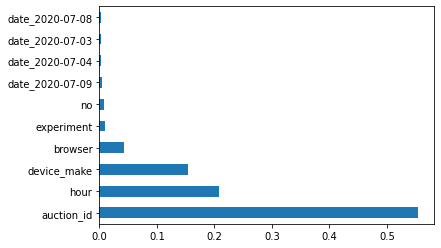

hour               0.207754
platform_os        0.002687
no                 0.007865
date_2020-07-03    0.002786
date_2020-07-04    0.002901
date_2020-07-05    0.001983
date_2020-07-06    0.002024
date_2020-07-07    0.002152
date_2020-07-08    0.002774
date_2020-07-09    0.003717
date_2020-07-10    0.002519
auction_id         0.554612
experiment         0.009949
device_make        0.154298
browser            0.041976
dtype: float64

In [19]:
analyzer.feature_importance()

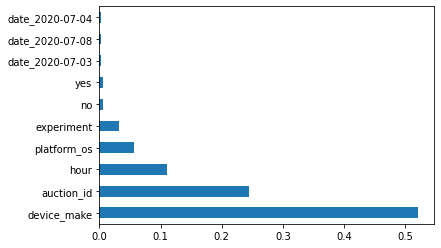

hour               0.110161
platform_os        0.056301
yes                0.006059
no                 0.006615
date_2020-07-03    0.003418
date_2020-07-04    0.003332
date_2020-07-05    0.003201
date_2020-07-06    0.002114
date_2020-07-07    0.003014
date_2020-07-08    0.003385
date_2020-07-09    0.003220
date_2020-07-10    0.002836
auction_id         0.243963
experiment         0.031472
device_make        0.520910
dtype: float64

In [20]:
analyzer.feature_importance(column="browser")

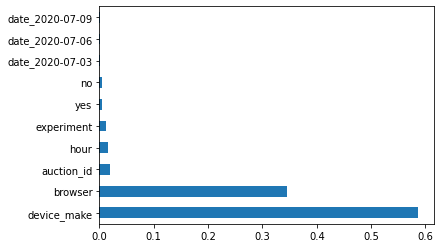

hour               0.015796
yes                0.004830
no                 0.004377
date_2020-07-03    0.001709
date_2020-07-04    0.001136
date_2020-07-05    0.001194
date_2020-07-06    0.001461
date_2020-07-07    0.001387
date_2020-07-08    0.001018
date_2020-07-09    0.001409
date_2020-07-10    0.001123
auction_id         0.019776
experiment         0.011948
device_make        0.586934
browser            0.345903
dtype: float64

In [21]:
analyzer.feature_importance(column="platform_os")

In [15]:
analyzer.log_loss(model = XGBClassifier)

0.2483202730247205

In [16]:
analyzer.log_loss(model = DecisionTreeClassifier)

4.537074478286067

In [17]:
analyzer.log_loss(model = RandomForestClassifier)

0.7007536680826406

In [18]:
analyzer.log_loss(model = LogisticRegression)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.25336770136997205